## Training with TPrime_600GeV_&_all_five_As_ background_with_VH_VHQ_gg
>This is the training of signal and bacgrund to get the output as a HDF5 file. The output file futher used to test on the TPrime at 1200GeV as signal.


Here, The input files are Signal with Tprime and background file used here are ttgg. Both have been used with the same number of input varaibles.'dipho_pt','dipho_phi', 'dipho_eta','dipho_e','dipho_mass','dipho_leadPt', 'dipho_leadEt','dipho_leadEta','dipho_leadPhi', 'dipho_subleadEta','bjet1_pt','bjet2_pt','bjet1_eta', 'bjet2_eta', 'jet1_pt','jet2_pt', 'jet1_eta', 'n_jets', 'n_bjets', 'bjet2_phi', 'bjet3_phi', 'bjet1_discr','bjet2_discr', 'bjet3_discr', 'jet3_pt', 'jet3_phi', 'jet1_e', 'jet2_e', 'jet3_e'.

In [1]:
import pandas as pd
import numpy as np
import math
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import adam, adadelta, adagrad

sns.set(color_codes = True)
sns.set_palette(sns.color_palette("muted"))

from itertools import tee, islice
from ROOT import TFile, TCanvas, TPad, TPaveLabel, TPaveText, TTree, TH1F, TF1
from root_numpy import root2array, tree2array, array2tree, array2root
import sys
from ROOT import gROOT, AddressOf
from root_numpy import root2array, rec2array
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.ticker as ticker
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn import tree

Using TensorFlow backend.


Welcome to JupyROOT 6.20/06


## Import the datasets

>Import all the signal and the backgrounds 
 * Signals 
     signal_TPrime_600 = /eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root
        

In [2]:
signal = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-600_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
back_1 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TTGG_0Jets_TuneCP5_13TeV_amcatnlo_madspin_pythia8.root'
back_01= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_ttHJetToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_02 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VBFHToGG_M125_13TeV_amcatnlo_pythia8.root'
back_03 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_VHToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8.root'
back_04 = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_THQ_ctcvcp_HToGG_M125_13TeV-madgraph-pythia8.root'
back_05= '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8.root'

In [3]:
treeName_back_1 ="tagsDumper/trees/ttgg_13TeV_THQLeptonicTag" 
treeName_signal = "tagsDumper/trees/Tprime_600_13TeV_THQLeptonicTag"
treeName_back_05 = "tagsDumper/trees/ggh_125_13TeV_THQLeptonicTag"
treeName_back_04 = "tagsDumper/trees/thq_125_13TeV_THQLeptonicTag"
treeName_back_03 = "tagsDumper/trees/vh_125_13TeV_THQLeptonicTag"
treeName_back_02 = 'tagsDumper/trees/vbf_125_13TeV_THQLeptonicTag'
treeName_back_01 = "tagsDumper/trees/tth_125_13TeV_THQLeptonicTag"


In [4]:
columns = ['dipho_leadPt',
             'dipho_mass',
             'dipho_leadEta',
             'dipho_subleadEta',
             'dipho_leadIDMVA',
             'dipho_subleadIDMVA',
             'dipho_lead_haspixelseed',
             'dipho_sublead_haspixelseed',
             'n_jets',
             'n_bjets',
             'n_centraljets',
             'lepton_charge',
             'lepton_leadPt',
             'lepton_leadEta',
             'fwdjet1_pt',
             'fwdjet1_eta',
             'fwdjet1_discr',
             'top_mt',
             'dr_tHchainfwdjet',
             'dr_leptonbjet',
             'dr_leptonfwdjet',
             'dr_bjetfwdjet',
             'dr_leadphofwdjet',
             'dr_subleadphofwdjet',
             'bjet1_pt',
             'bjet2_pt',
             'bjet3_pt',
             'bjet1_eta',
             'bjet2_eta',
             'bjet3_eta',
             'bjet1_discr',
             'bjet2_discr',
             'bjet3_discr',
             'jet1_pt',
             'jet2_pt',
             'jet3_pt',
             'jet1_eta',
             'jet2_eta',
             'jet3_eta',
             'jet1_discr',
             'jet2_discr',
             'jet3_discr']
             

In [5]:
signal_Tprime600 = root2array(signal, treeName_signal, columns)   #Signal TPrime at 600TeV
back_ttgg = root2array(back_1, treeName_back_1, columns)     # ttgg background(Not using this)
back_tth = root2array(back_01, treeName_back_01, columns)      
back_vbf = root2array(back_02, treeName_back_02, columns)
back_vh = root2array(back_03, treeName_back_03, columns)
back_thq = root2array(back_04, treeName_back_04, columns)
back_ggh = root2array(back_05, treeName_back_05, columns)


In [6]:
signal_Tprime600 = pd.DataFrame(signal_Tprime600)            #Signal for the testing
back_tth = pd.DataFrame(back_tth)          #tth background dataframe 
back_vbf = pd.DataFrame(back_vbf)             #vbf background dataframe 
back_vh = pd.DataFrame(back_vh)             #vh background dataframe 
back_thq = pd.DataFrame(back_thq) #thq background dataframe 
back_ggh = pd.DataFrame(back_ggh) #ggh background dataframe 
back_ttgg = pd.DataFrame(back_ttgg)

In [7]:
signal_Tprime600.head()

,dipho_leadPt,dipho_mass,dipho_leadEta,dipho_subleadEta,dipho_leadIDMVA,dipho_subleadIDMVA,dipho_lead_haspixelseed,dipho_sublead_haspixelseed,n_jets,n_bjets,...,bjet3_discr,jet1_pt,jet2_pt,jet3_pt,jet1_eta,jet2_eta,jet3_eta,jet1_discr,jet2_discr,jet3_discr
0,199.472260,126.641273,0.084015,1.195149,0.957987,0.687579,0.0,0.0,3.0,1.0,...,-999.0,84.649239,74.393456,32.669273,-0.487586,-3.465604,-2.688962,0.542797,-2.000000,-2.0
1,217.392303,124.014992,-0.121357,-0.101361,0.872169,0.967785,0.0,0.0,2.0,1.0,...,-999.0,112.434402,84.011833,-999.000000,0.293124,2.278897,-999.000000,0.638937,0.721447,-999.0
2,121.089691,123.836288,0.842742,1.373165,0.888976,0.919611,0.0,0.0,4.0,1.0,...,-999.0,91.825996,62.056263,38.143219,3.149675,-3.128838,4.403498,-2.000000,-2.000000,-2.0
3,158.326920,122.239555,0.202652,0.260665,0.956062,0.762749,0.0,0.0,2.0,1.0,...,-999.0,87.551056,85.922279,-999.000000,1.111560,2.848130,-999.000000,0.991427,-2.000000,-999.0
4,139.716736,123.026970,0.194240,0.534833,0.163151,0.361930,0.0,0.0,4.0,1.0,...,-999.0,177.258102,169.389847,27.921988,-0.204870,0.046312,-2.416145,0.998264,0.043448,-2.0


In [8]:



signal_Tprime600.shape

(81013, 42)

In [9]:
len(signal_Tprime600)

81013

In [10]:
signal_Tprime600.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81013 entries, 0 to 81012
Data columns (total 42 columns):
dipho_leadPt                  81013 non-null float32
dipho_mass                    81013 non-null float32
dipho_leadEta                 81013 non-null float32
dipho_subleadEta              81013 non-null float32
dipho_leadIDMVA               81013 non-null float32
dipho_subleadIDMVA            81013 non-null float32
dipho_lead_haspixelseed       81013 non-null float32
dipho_sublead_haspixelseed    81013 non-null float32
n_jets                        81013 non-null float32
n_bjets                       81013 non-null float32
n_centraljets                 81013 non-null float32
lepton_charge                 81013 non-null float32
lepton_leadPt                 81013 non-null float32
lepton_leadEta                81013 non-null float32
fwdjet1_pt                    81013 non-null float32
fwdjet1_eta                   81013 non-null float32
fwdjet1_discr                 81013 non-nul

In [11]:
assert signal_Tprime600.isnull().sum().sum() == 0

/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


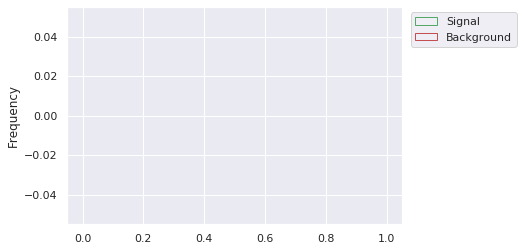

In [13]:
low_high=(0,1)
signal_Tprime600['top_mt'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'g', density=True, range=low_high, label = 'Signal')
back_ggh['top_mt'].plot.hist( alpha = 1, fill= False,
                                        histtype = 'step', edgecolor = 'r', density=True, range=low_high, label = 'Background')
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")
plt.show()


In [15]:
signal = signal_Tprime600
backgr = pd.concat(( back_ggh, back_vbf, back_vh, back_ttgg), axis=0)

In [16]:
X = np.concatenate((signal_Tprime600, backgr))
y = np.concatenate((np.ones(signal_Tprime600.shape[0]),
                    np.zeros(backgr.shape[0])))

In [17]:
X.shape, y.shape

((146668, 42), (146668,))

In [18]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state =5)


In [19]:
X_train.shape, y_train.shape

((98267, 42), (98267,))

In [20]:
X_test.shape, y_test.shape

((48401, 42), (48401,))

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils.vis_utils import plot_model
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from tensorflow.keras.initializers import RandomNormal, Constant

In [25]:
clf = Sequential()
# clf.add(LSTM(1, return_sequences=True ))
clf.add(BatchNormalization(input_shape = (42,)))
# clf.add(Dropout(3))
clf.add(Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_1'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(256, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_2'))
clf.add(Dropout(0.3))
clf.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_3'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(64, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform',name = 'dense_4'))
clf.add(BatchNormalization())
clf.add(Dropout(0.3))
clf.add(Dense(32, activation = 'relu',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'dense_5'))
clf.add(BatchNormalization(momentum=0.99,epsilon=0.001,beta_initializer=RandomNormal(mean=0.0, stddev=0.05),gamma_initializer=Constant(value=0.9)))

# Output
clf.add(Dense(1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.001), kernel_initializer = 'lecun_uniform', name = 'output'))
#compile model

# opt = SGD(lr=0.01, momentum=0.9)
clf.compile(loss = 'binary_crossentropy', 
            optimizer= 'adam',
            metrics=['accuracy'])
print('Summary of the built model...')
print(clf.summary())
# plot_model(clf, to_file='/eos/home-s/sraj/M.Sc._Thesis/Plot/''clf_plot_multiclass___.png', show_shapes=True, show_layer_names=True)

Summary of the built model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_11 (Batc (None, 42)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               11008     
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)       

In [26]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', verbose=1, patience =  10, mode = "auto", baseline = None)
# fit model
history = clf.fit(X_train, y_train, validation_split = 0.30, batch_size= 9000, epochs=100, verbose=1)
# evaluate the model

Train on 68786 samples, validate on 29481 samples
Epoch 1/100
68786/68786 [==============================] - 4s 58us/step - loss: 1.3457 - acc: 0.5931 - val_loss: 1.1775 - val_acc: 0.7497
Epoch 2/100
68786/68786 [==============================] - 1s 13us/step - loss: 1.1836 - acc: 0.7334 - val_loss: 1.0589 - val_acc: 0.8028
Epoch 3/100
68786/68786 [==============================] - 1s 13us/step - loss: 1.0817 - acc: 0.7889 - val_loss: 1.0000 - val_acc: 0.8279
Epoch 4/100
68786/68786 [==============================] - 1s 12us/step - loss: 1.0118 - acc: 0.8148 - val_loss: 0.9496 - val_acc: 0.8437
Epoch 5/100
68786/68786 [==============================] - 1s 12us/step - loss: 0.9514 - acc: 0.8320 - val_loss: 0.8916 - val_acc: 0.8562
Epoch 6/100
68786/68786 [==============================] - 1s 10us/step - loss: 0.8980 - acc: 0.8459 - val_loss: 0.8312 - val_acc: 0.8697
Epoch 7/100
68786/68786 [==============================] - 1s 11us/step - loss: 0.8432 - acc: 0.8595 - val_loss: 0.7755 - 

Epoch 60/100
68786/68786 [==============================] - 1s 11us/step - loss: 0.1993 - acc: 0.9380 - val_loss: 0.3288 - val_acc: 0.9281
Epoch 61/100
68786/68786 [==============================] - 1s 10us/step - loss: 0.2005 - acc: 0.9374 - val_loss: 0.3220 - val_acc: 0.9270
Epoch 62/100
68786/68786 [==============================] - 1s 11us/step - loss: 0.1972 - acc: 0.9375 - val_loss: 0.3361 - val_acc: 0.9244
Epoch 63/100
68786/68786 [==============================] - 1s 11us/step - loss: 0.1967 - acc: 0.9389 - val_loss: 0.3193 - val_acc: 0.9254
Epoch 64/100
68786/68786 [==============================] - 1s 11us/step - loss: 0.1951 - acc: 0.9379 - val_loss: 0.3161 - val_acc: 0.9271
Epoch 65/100
68786/68786 [==============================] - 1s 11us/step - loss: 0.1929 - acc: 0.9391 - val_loss: 0.2933 - val_acc: 0.9270
Epoch 66/100
68786/68786 [==============================] - 1s 11us/step - loss: 0.1936 - acc: 0.9384 - val_loss: 0.2990 - val_acc: 0.9269
Epoch 67/100
68786/68786 [=

2022-03-15 14:22:13.316428: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2022-03-15 14:22:13.373841: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2194915000 Hz
2022-03-15 14:22:13.377915: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0xfb79b40 executing computations on platform Host. Devices:
2022-03-15 14:22:13.377954: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2022-03-15 14:22:14.720463: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via T

## Training Outputs
The training output of the model is:

In [31]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_train, y_train, verbose=0)
print("Accuracy of the training: %.2f%%" % (scores[1]*100))

Accuracy of the training: 94.94%


In [32]:
# Final evaluation of the model for DNN
# Testing Outputs"$\pm$"
scores = clf.evaluate(X_test, y_test, verbose=0)
print("Accuracy for the testing on the: %.2f%%" % (scores[1]*100))

Accuracy for the testing on the: 92.67%


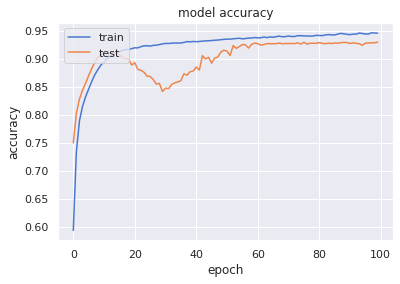

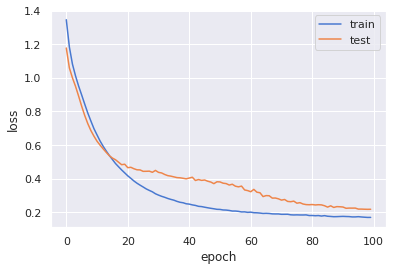

In [33]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# plt.savefig('model_accuracy_TPrime_ttgg_&tth&thq.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.title('model loss,random_state=5, epoch =100,batch_size =900, verbose=0.25')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
# plt.savefig('loss_TPrime_ttgg_&tth&thq.png')
plt.show()

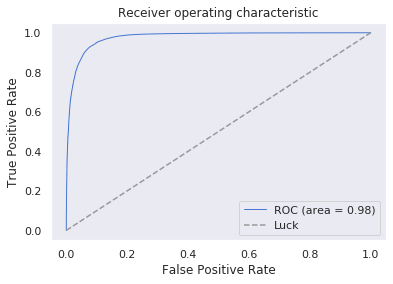

In [75]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))


plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

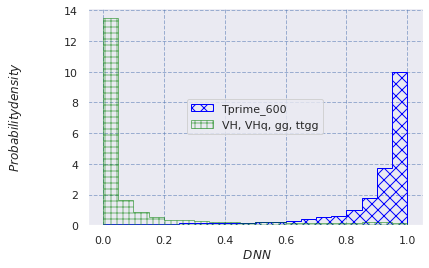

In [80]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_test==0]
tSig_1 = tTest[y_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig_1, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600')
n, bins, patches = plt.hist(tBkg_1, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'VH, VHq, gg, ttgg')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [42]:
%time

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 23.1 µs


### Saving the output of the file as a HDF5 file

In [43]:
import h5py
from keras.models import model_from_json

# hf.create_dataset('dataset_1', h)

In [44]:
model_json = clf.to_json()
with open("model(with VH,VHQ,gg,ttgg as background and TPrime_600 signal_train).json", "w") as json_file:
    json_file.write(model_json)
#serialize weights to HDF5
clf.save_weights("model(with VH,VHQ,gg,ttgg as background and TPrime_600 signal_train).h5")
print("saved trained model with combined background and a signal to disk")

saved trained model with combined background and a signal to disk


In [45]:
# load json and create model
json_file = open('model(with VH,VHQ,gg,ttgg as background and TPrime_600 signal_train).json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model(with VH,VHQ,gg,ttgg as background and TPrime_600 signal_train).h5")
print("Loaded model from disk")

Loaded model from disk


In [46]:
# evaluate loaded model on test data of TPrime_600
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test)

48401/48401 [==============================] - 3s 65us/step


In [47]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_test, y_test, verbose=0)
print('It should be compatible with the previous output from the test dataset: \n'"Here the Accuracy ouput is: \n Accuracy: %.2f%%" % (scores[1]*100))

It should be compatible with the previous output from the test dataset: 
Here the Accuracy ouput is: 
 Accuracy: 92.67%


In [48]:
print(X_test.shape)
print(y_test.shape)

(48401, 42)
(48401,)


### Testing on the Tpime at CMS energy $\sqrt{s}$ = 900GeV as signal.

In [50]:
# Loading the corresposnding Testing dataset on $\sqrt s$ = 900GeV
signal_0 = signal = '/eos/home-s/sraj/M.Sc._Thesis/data_files/output_TprimeBToTH_Hgg_M-1200_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root'
treeName_signal_0 = "tagsDumper/trees/Tprime_1200_13TeV_THQLeptonicTag"
signal_Tprime1200 = root2array(signal_0, treeName_signal_0, columns)   #Signal TPrime at 600TeV

In [51]:
signal_Tprime1200 = pd.DataFrame(signal_Tprime1200)

In [52]:

signal_Tprime1200.head()

,dipho_leadPt,dipho_mass,dipho_leadEta,dipho_subleadEta,dipho_leadIDMVA,dipho_subleadIDMVA,dipho_lead_haspixelseed,dipho_sublead_haspixelseed,n_jets,n_bjets,...,bjet3_discr,jet1_pt,jet2_pt,jet3_pt,jet1_eta,jet2_eta,jet3_eta,jet1_discr,jet2_discr,jet3_discr
0,534.582397,125.027214,0.566175,0.996379,0.944314,0.929853,0.0,0.0,5.0,2.0,...,-999.000000,311.581604,144.228638,90.022743,0.048455,-2.035239,3.420674,0.985339,0.047269,-2.000000
1,287.602081,124.728577,-0.733117,-0.519446,0.959960,0.918737,0.0,0.0,5.0,3.0,...,0.254300,159.142563,93.359550,60.414616,0.157884,-2.040476,2.550436,0.254300,0.030940,0.505706
2,246.845337,123.324104,-0.460441,-0.968103,0.922660,0.970355,0.0,0.0,2.0,1.0,...,-999.000000,58.944019,48.547359,-999.000000,-2.324409,-0.171253,-999.000000,0.069687,0.999494,-999.000000
3,530.529053,124.927475,-0.195753,-0.550637,0.968185,0.959774,0.0,0.0,3.0,1.0,...,-999.000000,283.501984,92.928520,29.110281,-0.501745,4.469100,-2.801659,0.998836,-2.000000,-2.000000
4,421.636475,124.109444,0.551736,0.886035,0.975925,0.969419,0.0,0.0,6.0,3.0,...,0.173882,158.900589,154.219620,103.105125,2.175221,-0.654846,-2.812661,0.999373,0.036432,-2.000000


In [53]:
signal_Tprime1200.shape

(107628, 42)

In [54]:
y_test.shape

(48401,)

Here, there are two methods to get through the ouput on the testing files, First to directly use the **Testing files** or use with all the given backgrounds you have taken
#### Method 1

In [55]:
loaded_model.evaluate(signal_Tprime1200)

IndexError: list index out of range

This is the error due to data mismatch

In [58]:
df = signal_Tprime1200.loc[:48400].copy()

In [59]:
df.shape

(48401, 42)

In [60]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(df, y_test)

48401/48401 [==============================] - 5s 102us/step


In [61]:
# # Final evaluation of the model for DNN
# # Testing Outputs
scores = clf.evaluate(df, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 53.86%


In [43]:
# from sklearn.metrics import roc_curve, auc

# decisions = clf.predict(X_test)

# # Compute ROC curve and area under the curve
# fpr, tpr, thresholds = roc_curve(y_test, decisions)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

# plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.grid()
# # plt.savefig("ROC_curve.png")
# plt.show()

In [44]:
# import matplotlib
# plt.figure()                                     # new window
# matplotlib.rcParams.update({'font.size':14})     # set all font sizes
# tTest = clf.predict(X_test)
# # if hasattr(clf, "decision_function"):
# #     tTest = clf.decision_function(X_test)        # if available use decision_function
# # else:
# #     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
# tBkg = tTest[y_test==0]
# tSig = tTest[y_test==1]
# nBins = 20
# tMin = np.floor(np.min(tTest))
# tMax = np.ceil(np.max(tTest))
# bins = np.linspace(tMin, tMax, nBins+1)
# # plt.title('Multilayer perceptron')
# plt.xlabel(' $DNN$', labelpad=3)
# plt.ylabel('$Probability density$', labelpad=40)
# n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_600')
# n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background(-thq)')
# plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
# plt.legend(loc='center')
# # plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot/''output_TPrime_ttgg.png')
# plt.show()

In [45]:
# from sklearn.metrics import roc_curve, auc

# decisions = clf.predict(df)

# # Compute ROC curve and area under the curve
# fpr, tpr, thresholds = roc_curve(y_test, decisions)
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

# plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.grid()
# # plt.savefig("ROC_curve.png")
# plt.show()

In [46]:
# plt.figure()                                     # new window
# matplotlib.rcParams.update({'font.size':14})     # set all font sizes
# tTest = clf.predict(df)
# # if hasattr(clf, "decision_function"):
# #     tTest = clf.decision_function(X_test)        # if available use decision_function
# # else:
# #     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
# tBkg = tTest[y_test==0]
# tSig = tTest[y_test==1]
# nBins = 20
# tMin = np.floor(np.min(tTest))
# tMax = np.ceil(np.max(tTest))
# bins = np.linspace(tMin, tMax, nBins+1)
# # plt.title('Multilayer perceptron')
# plt.xlabel(' $DNN$', labelpad=3)
# plt.ylabel('$Probability density$', labelpad=40)
# n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
# n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'All Background')
# plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
# plt.legend(loc='center')
# plt.title('TPrime_1200 output after TPrime_600 Training with all background ')
# # plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
# plt.show()

#### method 2

In [62]:
X_1 = np.concatenate((signal_Tprime1200, backgr))
y_1 = np.concatenate((np.ones(signal_Tprime1200.shape[0]),
                    np.zeros(backgr.shape[0])))

In [63]:
y_1.shape

(173283,)

In [64]:
X_1_train,X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.33, random_state =5)


In [65]:
X_1_train.shape


(116099, 42)

In [68]:
y_1_train.shape

(116099,)

In [66]:
X_1_test.shape

(57184, 42)

In [67]:
y_1_test.shape

(57184,)

In [69]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_1_test, y_1_test)

57184/57184 [==============================] - 4s 67us/step


In [70]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = clf.evaluate(X_1_test, y_1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 87.02%


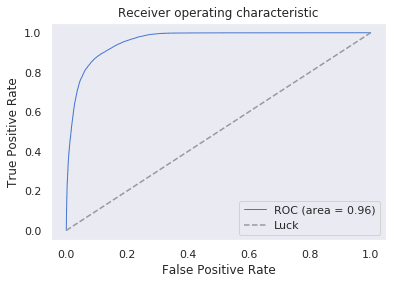

In [71]:
from sklearn.metrics import roc_curve, auc

decisions = clf.predict(X_1_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_1_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

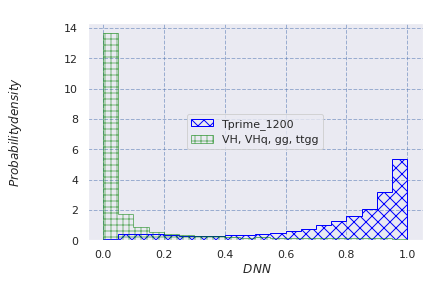

In [82]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = clf.predict(X_1_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_1 = tTest[y_1_test==0]
tSig_1 = tTest[y_1_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_1200')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'VH, VHq, gg, ttgg')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title(' ')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [81]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile,TH1D
from ROOT import gROOT, gBenchmark

In [96]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_VH_VHq_gg_ttgg_as_background_tested_with_TPrime1200.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg_1:
    h_bak.Fill(i)
for j in tSig_1:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()

Here, The output from the Ist method is not as good as the 2nd one.

## testing on TPrime_900GeV


In [84]:
# Load Testing dataset
signal_1 = '/eos/user/p/prsaha/for_Shivam/output_TprimeBToTH_Hgg_M-900_LH_TuneCP5_PSweights_13TeV-madgraph_pythia8.root/'
treeName_signal_1 = "tagsDumper/trees/Tprime_900_13TeV_THQLeptonicTag"
signal_Tprime900 = root2array(signal_1, treeName_signal_1, columns)   #Signal TPrime at 600TeV

In [85]:
signal_Tprime900;
signal_Tprime900 = pd.DataFrame(signal_Tprime900)

In [86]:
X_2 = np.concatenate((signal_Tprime900, backgr))
y_2 = np.concatenate((np.ones(signal_Tprime900.shape[0]),
                    np.zeros(backgr.shape[0])))

In [87]:
X_2_train,X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.33, random_state =5)


In [88]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_2_test, y_2_test)

54984/54984 [==============================] - 4s 73us/step


In [89]:
# Final evaluation of the model for DNN
# Testing Outputs
scores = loaded_model.evaluate(X_2_test, y_2_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 94.65%


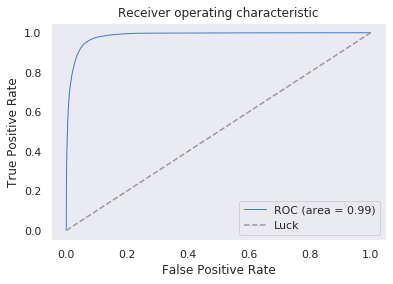

In [90]:
from sklearn.metrics import roc_curve, auc

decisions = loaded_model.predict(X_2_test)

# Compute ROC curve and area under the curve
fpr, tpr, thresholds = roc_curve(y_2_test, decisions)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.grid()
# plt.savefig("ROC_curve.png")
plt.show()

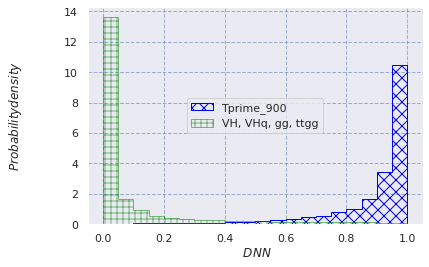

In [93]:
import matplotlib
plt.figure()                                     # new window
matplotlib.rcParams.update({'font.size':14})     # set all font sizes
tTest = loaded_model.predict(X_2_test)
# if hasattr(clf, "decision_function"):
#     tTest = clf.decision_function(X_test)        # if available use decision_function
# else:
#     tTest = clf.predict_proba(X_test)[:,1]       # for e.g. MLP need to use predict_proba
tBkg_2 = tTest[y_2_test==0]
tSig_2 = tTest[y_2_test==1]
nBins = 20
tMin = np.floor(np.min(tTest))
tMax = np.ceil(np.max(tTest))
bins = np.linspace(tMin, tMax, nBins+1)
# plt.title('Multilayer perceptron')
plt.xlabel(' $DNN$', labelpad=3)
plt.ylabel('$Probability density$', labelpad=40)
n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color ='dodgerblue' ,edgecolor = 'blue', hatch = 'XX',label='Tprime_900')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False,color = 'red' ,alpha=0.5, edgecolor = 'green', hatch='++', label = 'VH, VHq, gg, ttgg')
plt.grid(color = 'b', alpha = 0.5, linestyle = 'dashed')
plt.legend(loc='center')
plt.title('')
# plt.savefig('/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/Plot_with_HDF5_files/''output_TPrime1200_all_background.png')
plt.show()

In [92]:
from ROOT import TCanvas, TPad, TFormula, TF1, TPaveLabel, TH1F, TFile,TH1D
from ROOT import gROOT, gBenchmark

In [97]:
f = TFile("/eos/home-s/sraj/M.Sc._Thesis/Plot_M.Sc._thesis/ROOT_output/MyrootFile_after_training_Tprime_600_backgrounds_VH_VHq_gg_ttgg_test_with_TPrime900.root", "RECREATE")
# tree = TTree("root",  )
# How do we get that to create and fill with the background and signal
h_bak = TH1D("background", "background", 100, 0,1)
h_sig = TH1D("signal", "signal", 100, 0, 1)
h_sum_all = TH1D("data_obs", "data_obs", 100, 0, 1)
for i in tBkg_2:
    h_bak.Fill(i)
for j in tSig_2:
    h_sig.Fill(j)
h_sum_all.Add(h_bak) 
h_sum_all.Add(h_sig)



f.Write()
f.Close()